# Installing the important packages

In [ ]:
!pip install opencv-python
import cv2

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install --upgrade intel-extension-for-tensorflow[gpu]

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0rc1
    Unin

import tensorflow as tf

import os
from PIL import Image 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split 
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.utils import to_categorical
import joblib

# Importing the brain tumor dataset

In [24]:
image_directory='datasets/'
dataset=[]
label=[]
no_tumor_images=os.listdir(image_directory+'no/')
yes_tumor_images=os.listdir(image_directory+'yes/')

# Reading the image dataset to the numpy array

In [25]:
for i,image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image = cv2.imread(image_directory + 'no/' + image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)

In [26]:
dataset=np.array(dataset)
label=np.array(label)

# Splitting the training and testing dataset

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset,label,test_size=0.2,random_state=0)


# Normalizing the dataset 

In [28]:
X_train = normalize(X_train,axis=1)
X_test = normalize(X_test,axis=1)

Y_train = to_categorical(Y_train,num_classes=2)
Y_test = to_categorical(Y_test,num_classes=2)

In [29]:
!pip install keras==2.12.0rc1 

Defaulting to user installation because normal site-packages is not writeable


# Training the model and exporting the model to a pickle file

In [30]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=16,verbose=True,epochs=10,validation_data=(X_test,Y_test),shuffle=False)

model.save('BrainTumor10EpochsCategorical.h5')

joblib.dump(model,'model.pkl')


Epoch 1/10


2023-08-10 23:28:39.536928: E itex/core/wrapper/itex_gpu_wrapper.cc:49] Could not load Intel Extension for Tensorflow* GPU backend, GPU will not be used.
If you need help, create an issue at https://github.com/intel/intel-extension-for-tensorflow/issues


70/70 [==============================] - 7s 90ms/step - loss: 0.0432 - accuracy: 0.9929 - val_loss: 2.0256e-14 - val_accuracy: 1.0000
Epoch 2/10
70/70 [==============================] - 7s 105ms/step - loss: 1.4026e-05 - accuracy: 1.0000 - val_loss: 2.8888e-14 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 7s 100ms/step - loss: 1.4279e-04 - accuracy: 1.0000 - val_loss: 9.2913e-15 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 7s 104ms/step - loss: 2.8086e-06 - accuracy: 1.0000 - val_loss: 4.8039e-15 - val_accuracy: 1.0000
Epoch 5/10
70/70 [==============================] - 7s 94ms/step - loss: 1.8726e-06 - accuracy: 1.0000 - val_loss: 3.6562e-15 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 7s 104ms/step - loss: 3.4157e-06 - accuracy: 1.0000 - val_loss: 1.8694e-15 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 7s 99ms/step - loss: 2.7524e-06 - accuracy: 1.0000 - val_loss: 5.

['model.pkl']

# Loading the pickle file

model=joblib.load('model.pkl')

# Reading a sample image

In [87]:
image=cv2.imread('datasets/pred/pred0.jpg')
print(image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


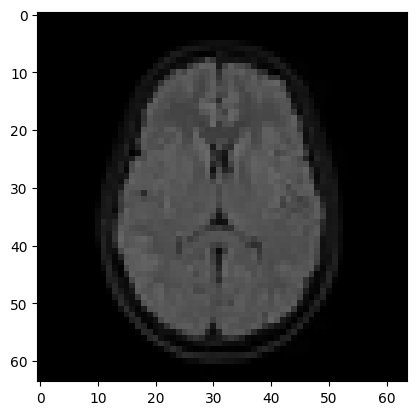

In [88]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [89]:
from PIL import Image

# Storing the image in a numpy array

In [90]:
img = Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)

# Predicting whether the individual is suffering from Brain Tumor or not

In [91]:
input_img=np.expand_dims(img,axis=0)


probabilities = model.predict(input_img)

probabilities = probabilities.tolist()
if(probabilities[0][0]==1.0):
    probabilities=1
else:
    probabilities=0


1/1 [==============================] - 0s 91ms/step


In [92]:
if(probabilities==1):
    print("The individual is suffering from brain tumor")
else:
    print("The individual is not suffering from brain tumor")

The individual is suffering from brain tumor


# Testing for a tumorous brain

In [95]:
image=cv2.imread('datasets/pred/pred5.jpg')
print(image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  7]
  [10 10 10]
  [12 12 12]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  7]
  [10 10 10]
  [12 12 12]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  7]
  [10 10 10]
  [12 12 12]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]]


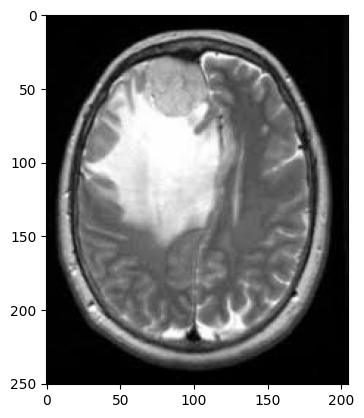

In [96]:
plt.imshow(image)

In [97]:
from PIL import Image

In [98]:
img = Image.fromarray(image)
img=img.resize((64,64))
img=np.array(img)

In [99]:
input_img=np.expand_dims(img,axis=0)


probabilities = model.predict(input_img)

probabilities = probabilities.tolist()
if(probabilities[0][0]==1.0):
    probabilities=1
else:
    probabilities=0


1/1 [==============================] - 0s 81ms/step


In [100]:
if(probabilities==1):
    print("The individual is suffering from brain tumor")
else:
    print("The individual is not suffering from brain tumor")

The individual is suffering from brain tumor
